# Netflix Exploratory Data Analysis

### Following [Shashank Kalanithi](https://youtu.be/E-q24gS8cqg)

## Import Data

In [2]:
import pandas as pd
import plotly.express as px

In [3]:
data_import = pd.read_csv('data/netflix-titles.csv', parse_dates=['date_added'])

### Pandas Options

In [4]:
pd.set_option('display.max_colwidth', None)

## High Level EDA

In [5]:
data_import.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

### Numerical Column Describe

In [6]:
data_import.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Date Analysis

<AxesSubplot:>

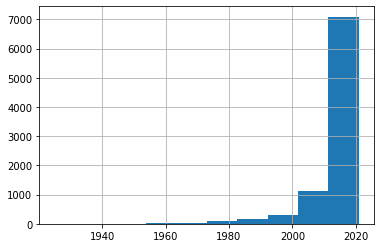

In [7]:
data_import['release_year'].hist() # Matplotlib

In [8]:
px.histogram(data_import, 'release_year', color="type") # Plotly

In [9]:
data_import[data_import["release_year"] == 1925]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,"This collection restores films from women who tackled hot-button issues, transcended norms, and left a mark on the history of cinema and the industry."


<AxesSubplot:>

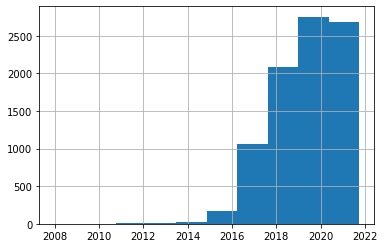

In [10]:
data_import['date_added'].hist() # Matplotlib

In [11]:
# Extract month from date_added

data_import["date_added_day"] = data_import["date_added"].dt.day.fillna(0)
data_import["date_added_month"] = data_import["date_added"].dt.month.fillna(0)

In [12]:
px.histogram(data_import, 'date_added', color="date_added_month") # Histogram of date_added

In [13]:
px.histogram(data_import, "date_added_day", color="type") # Histogram of date_added_day => Items are added generally on 1st of month

### String Column Analysis

In [14]:
data_import.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_day', 'date_added_month'],
      dtype='object')

In [15]:
data_import["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [24]:
expand_country = data_import["country"].str.split(",", expand=True, )
country_count = data_import.copy()
country_count = pd.concat([country_count, expand_country], axis=1)
country_count = country_count.melt(id_vars=["type", "title"], value_vars=range(12), value_name="Country")
country_count = country_count[country_count["Country"].notna()]
country_count["Country"] = country_count["Country"].str.strip()
country_count

In [25]:
fig = px.histogram(
  country_count,
  "Country",
  color="type",
)

fig.update_xaxes(
  categoryorder="total descending"
  )

fig

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'date_added_day', 'date_added_month', 'Cast Count', 0, 1, 2, 3, 4, 5, 6, 7] but received: Country

In [19]:
ratings_filt = (data_import["rating"] == '74 min') | (data_import["rating"] == '84 min') | (data_import["rating"] == '66 min')
ratings = data_import[~ratings_filt]

px.histogram(
  ratings,
  "rating",
  color="type",
  category_orders={
    "rating": ['TV-Y', 'TV-Y7', 'TV-Y7-FV', 'G', 'TV-G', 'PG', 'TV-PG', 'PG-13', 'TV-14', 'TV-MA', 'R', 'NC-17', 'NR', 'UR']
    }
  )

In [20]:
data_import["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [21]:
data_import["Cast Count"] = data_import["cast"].str.split(",")
cast_filt = data_import["Cast Count"].notna()
data_import = data_import[cast_filt]
data_import["Cast Count"] = data_import["Cast Count"].apply(lambda cast_list: len(cast_list))
data_import

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_day,date_added_month,Cast Count
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.",24.0,9.0,19
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.",24.0,9.0,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.",24.0,9.0,8
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe.",24.0,9.0,16
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,"Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be pals — and, hoof to heart, she’s determined to prove it.",24.0,9.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, Mansoor Alfeeli, Ahd","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers","Recovering alcoholic Talal wakes up inside a small-town police station cell, where he's subject to the mind games of a psychotic sadist.",9.0,3.0,6
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey Jr., Anthony Edwards, Brian Cox, Elias Koteas, Donal Logue, John Carroll Lynch, Dermot Mulroney, Chloë Sevigny",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a pair of cops investigate San Francisco's infamous Zodiac Killer in this thriller based on a true story.",20.0,11.0,10
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies","Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters.",1.0,11.0,7
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comed